## Homework #5. Exploratory Data Analysis
#### Author: `Bohdan Hurskyi`
#### Total time spent on h/w (in minutes): 2300

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import warnings
import json
import numpy as np
import advertools as adv
from PIL import Image

warnings.filterwarnings("ignore")


In [7]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"
stopWords = "../stop.txt"
cuss = "../curse_words_ru.txt"

In [8]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

In [9]:
my_id = "497713871"

# Почнімо з wordclouds
у цьому блоці я зчитую stopwords з файлика

In [729]:
my_file = open(stopWords, encoding = 'utf-8', mode = 'r')
data = my_file.read()
  
# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
data_into_list = data.split()
print(data_into_list)
my_file.close()

['a', 'б', 'в', 'г', 'е', 'ж', 'з', 'м', 'т', 'у', 'я', 'є', 'і', 'аж', 'ви', 'де', 'до', 'за', 'зі', 'ми', 'на', 'ну', 'нх', 'по', 'та', 'ти', 'то', 'ту', 'ті', 'це', 'цю', 'ця', 'ці', 'чи', 'ще', 'що', 'як', 'їй', 'їм', 'їх', 'її', 'або', 'але', 'ало', 'без', 'був', 'вам', 'вас', 'ваш', 'вже', 'все', 'всю', 'вся', 'від', 'він', 'два', 'дві', 'для', 'ким', 'мож', 'моя', 'моє', 'мої', 'міг', 'між', 'мій', 'нам', 'нас', 'наш', 'нею', 'неї', 'них', 'ніж', 'ній', 'ось', 'при', 'про', 'пір', 'раз', 'рік', 'сам', 'сих', 'так', 'там', 'теж', 'тим', 'тих', 'той', 'тою', 'три', 'тут', 'хоч', 'хто', 'цей', 'цим', 'цих', 'час', 'щоб', 'яка', 'які', 'адже', 'буде', 'буду', 'будь', 'була', 'були', 'було', 'бути', 'вами', 'ваша', 'ваше', 'ваші', 'весь', 'вниз', 'вона', 'вони', 'воно', 'всею', 'всім', 'всіх', 'втім', 'геть', 'далі', 'зате', 'його', 'йому', 'каже', 'кого', 'коли', 'кому', 'крім', 'куди', 'лише', 'мало', 'мене', 'мені', 'мною', 'нами', 'наша', 'наше', 'наші', 'ними', 'ніби', 'поки', '

### Які слова я найчастіше вживає у свої Дні Народження?

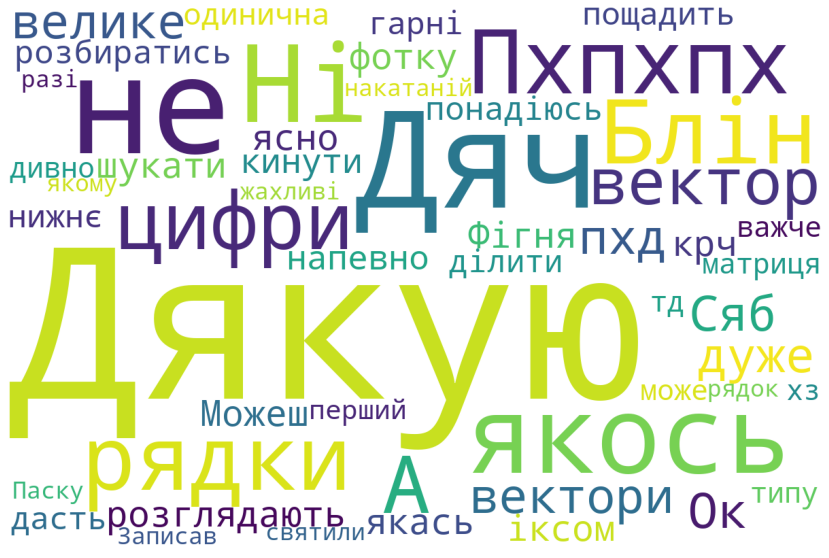

In [771]:
df_birthday= df.copy()
df_birthday=df_birthday.loc[df_birthday['date'].str.contains('-04-25')]
df_birthday=df_birthday.loc[df_birthday['from_id'] == 'PeerUser(user_id='+my_id+')']
df_birthday=df_birthday.loc[df_birthday['type'] == 'text']
df_birthday.head(10)
text = ' '.join(df_birthday["message"])
wordcloud = WordCloud(prefer_horizontal=1,background_color='white',width=1200, height=800,stopwords=data_into_list).generate(text)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Результат досить очевидний, найчастіше слово "Дякую" і багато слів пов'язаних з навчанням, бо цей період зачасту припадає на сесію

### Тепер розглянемо просто слова, які я вживаю найчастіше

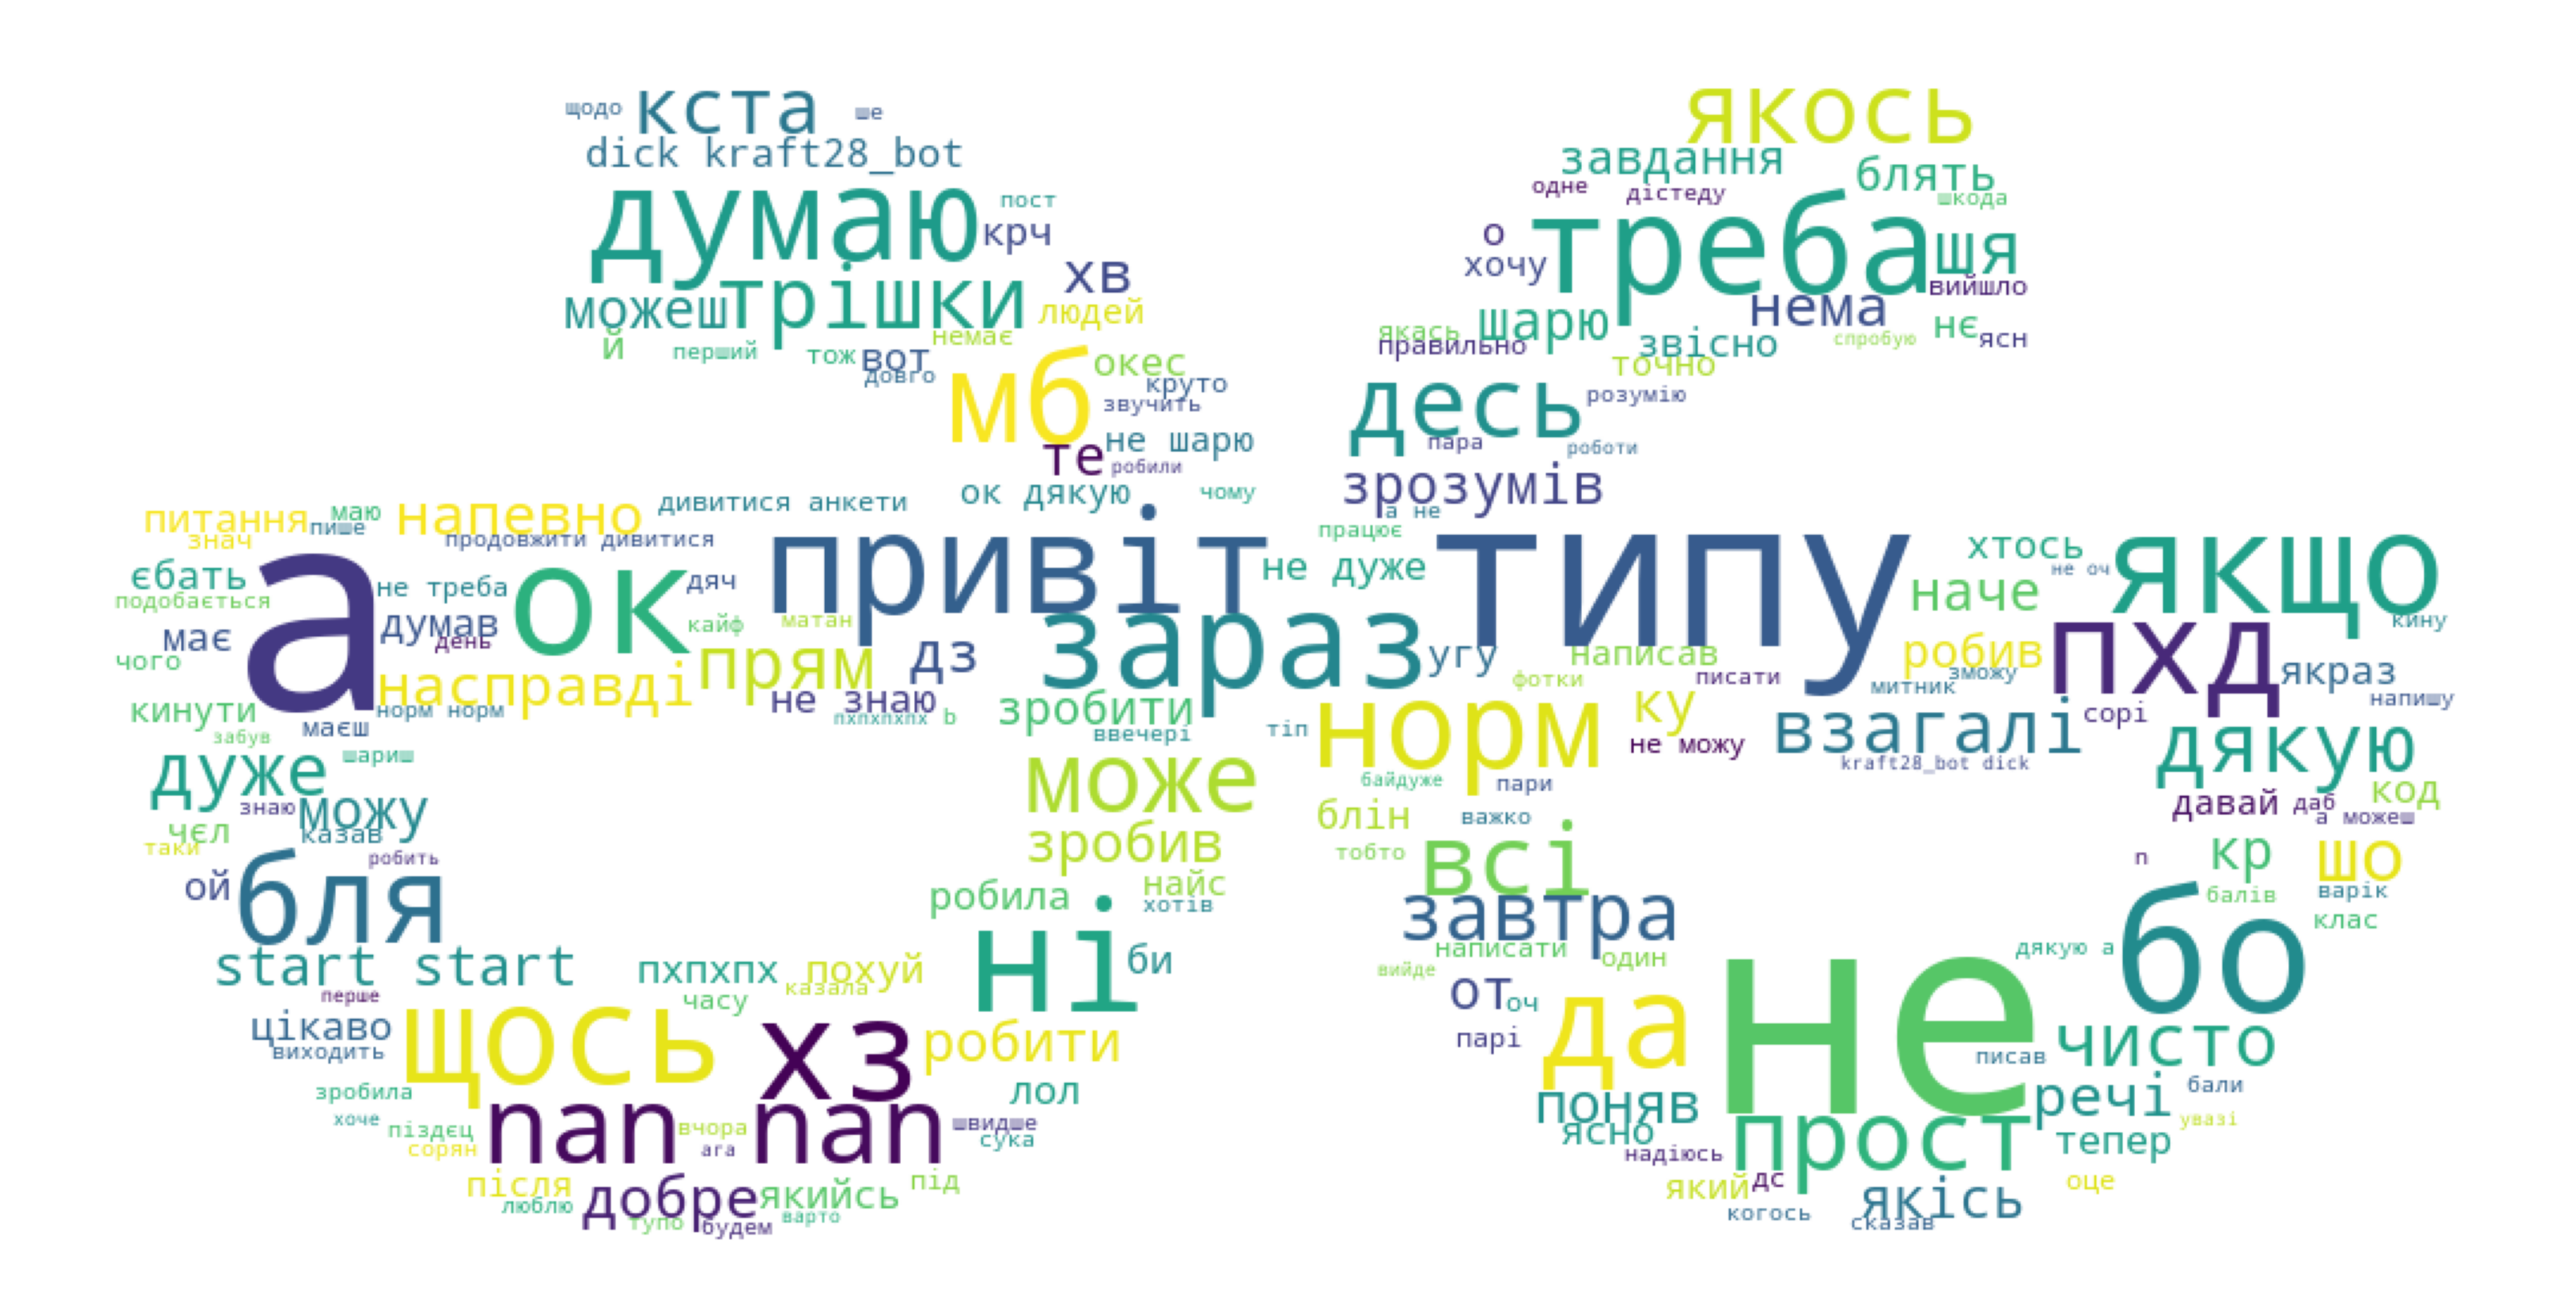

In [726]:

df_used= df
df_used=df_used.loc[df_used['type'] == 'text']
df_used=df_used.loc[df_used['from_id'] == 'PeerUser(user_id='+my_id+')']

text = ' '.join(str(x) for x in df_used["message"]) 
text = text.lower()
Mask = np.array(Image.open(r'C:\Users\gursk\Downloads\data\merged_data\Untitleddesign11.png'))

wordcloud = WordCloud(prefer_horizontal=1,mask=Mask,background_color='white',width=1200, height=800,stopwords=data_into_list).generate(text)
plt.figure( figsize=(60,30) )
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

#  ☑️Улюблені стікери
Цей код я взяв, з вільного джерела. Трішки адаптував під свої потреби

In [6]:
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import plotly


df_emo= df
df_emo=df_emo.loc[df_emo['type'] == 'sticker']
df_emo=df_emo.loc[df_emo['from_id'] == 'PeerUser(user_id='+my_id+')']

emoji_counts = df_emo["message"].value_counts().rename('Count').sort_values().reset_index().rename(columns={'index':'Emoji'})
emoji_counts = emoji_counts.tail(12)

У блоці зверху я обчислив стікери, у нижньому вивів scatter через plotly, бо він єдиний норм працює з emoji

In [7]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=emoji_counts['Emoji'],
                x=emoji_counts['Count'],
                name='Emoji Counts',
                marker_color='white',
                orientation='h',
                text=emoji_counts['Emoji'],
                textposition='top center',
                mode='markers+text',
                textfont=dict(size=30),
                ))

fig.update_yaxes(visible =False, range=[0, len(emoji_counts)+1])
fig.update_xaxes(title='Number of Times Used')
fig.update_layout(title_text='My most used stickers', title_x=0.5)

fig.update_layout(
    template='simple_white', 
    height=len(emoji_counts)*75, width = 800)

# Дослідження Приватних повідомлень
###  ☑️Співвідношення надісланих/отриманних

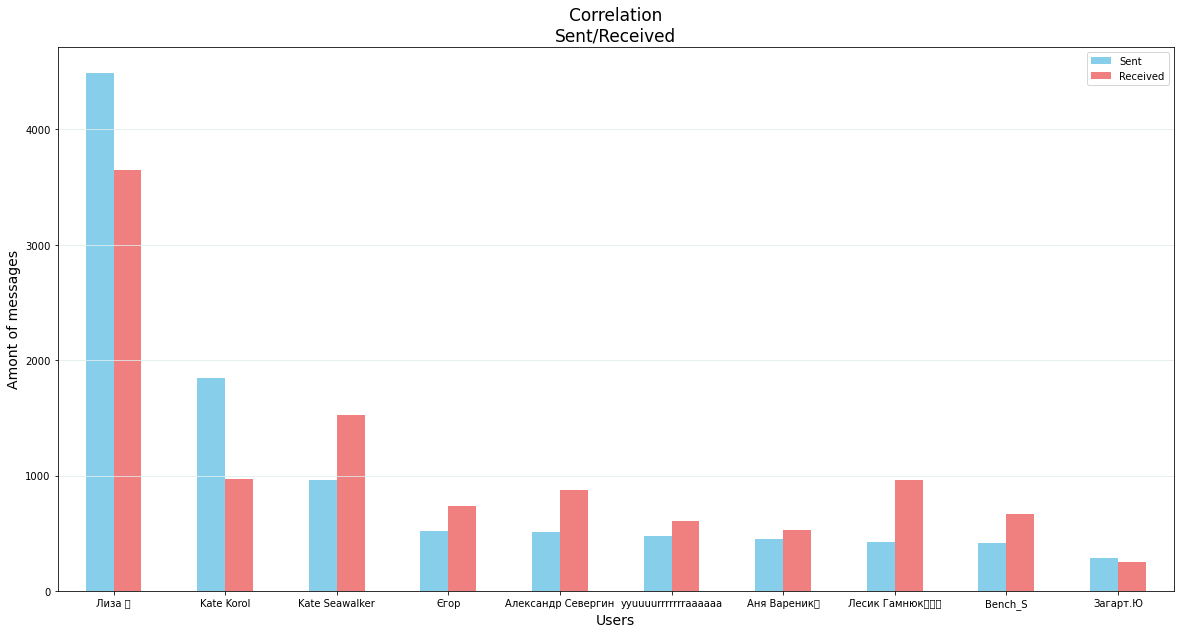

<Figure size 432x288 with 0 Axes>

In [9]:
df_pp = df_meta.loc[df_meta['type'] == 'Private dialog']
merged = df_pp.merge(df, on='dialog_id', how='inner')

merged_me=merged.loc[merged['to_id'] == my_id]
merged_me = merged_me["name"].value_counts().rename_axis('unique_values').to_frame('counts')

merged_i=merged.loc[merged['from_id'] == 'PeerUser(user_id='+my_id+')']
merged_i = merged_i["name"].value_counts().rename_axis('unique_values').to_frame('counts')

merged2 = merged_i.merge(merged_me, on='unique_values', how='inner')
merged2 = merged2.loc[merged2['counts_x'] <10000]#just get rid of big bots
merged2=merged2.rename(columns={'counts_x': 'Sent', 'counts_y': 'Received'})
merged2=merged2.head(10)

ax = merged2.plot.bar(color=["SkyBlue","lightCoral"], rot=0, figsize=(20,10))
ax.set_xlabel("Users",fontsize=14)
ax.yaxis.grid(True, color='#DEEEEE')
ax.set_title("Correlation\nSent/Received",fontsize=17)
ax.set_ylabel("Amont of messages",fontsize=14)

plt.show()
plt.savefig('foo.png')

Тепер обчислимо співвідношення відправдених до отриманих

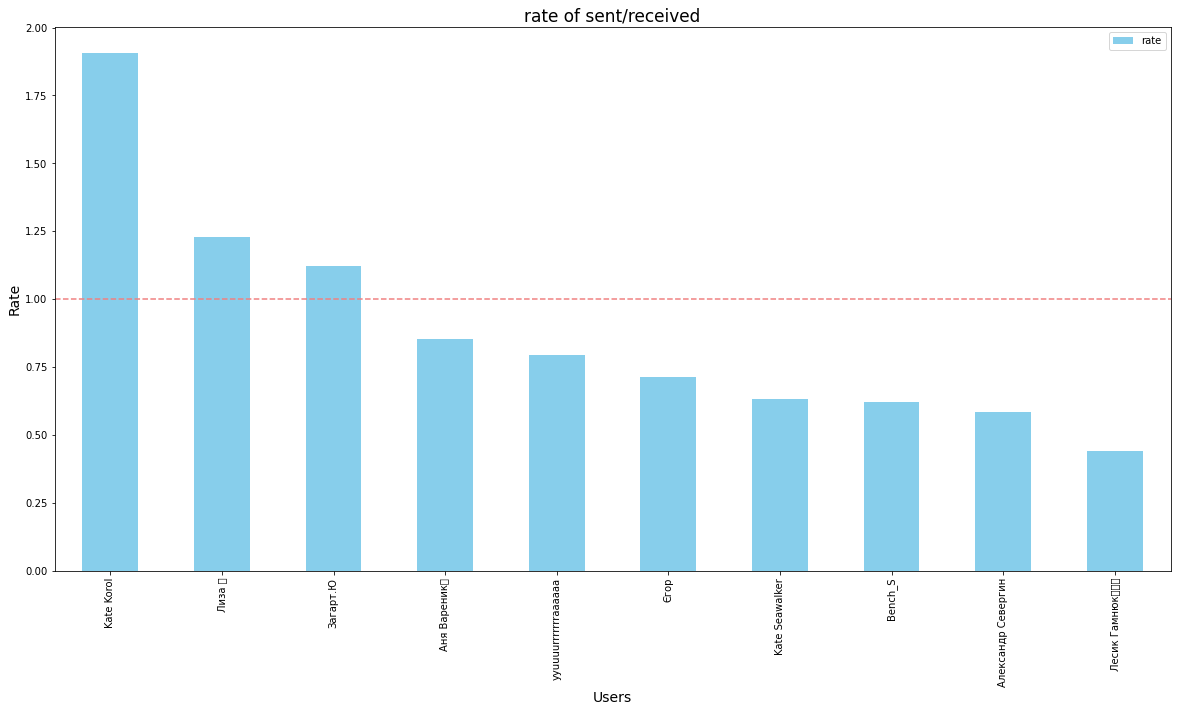

In [888]:
merged2["rate"] = merged2["Sent"]/merged2["Received"]
merged2.sort_values(by=['rate'], inplace=True,ascending=False)

ax = merged2.plot.bar(color="SkyBlue",y='rate', figsize=(20,10))
ax.set_xlabel("Users",fontsize=14)
ax.set_ylabel("Rate",fontsize=14)
ax.set_title("rate of sent/received",fontsize=17)

ax.axhline(y=1, color='lightCoral', linestyle='dashed')


А тут ми обчислимо simp ефект. (Наскільки стать мого співрозмовника впливає на мою зацікавленність в переписці)

Sex  AVG Rate
0  Female  1.159757
1    Male  0.611645

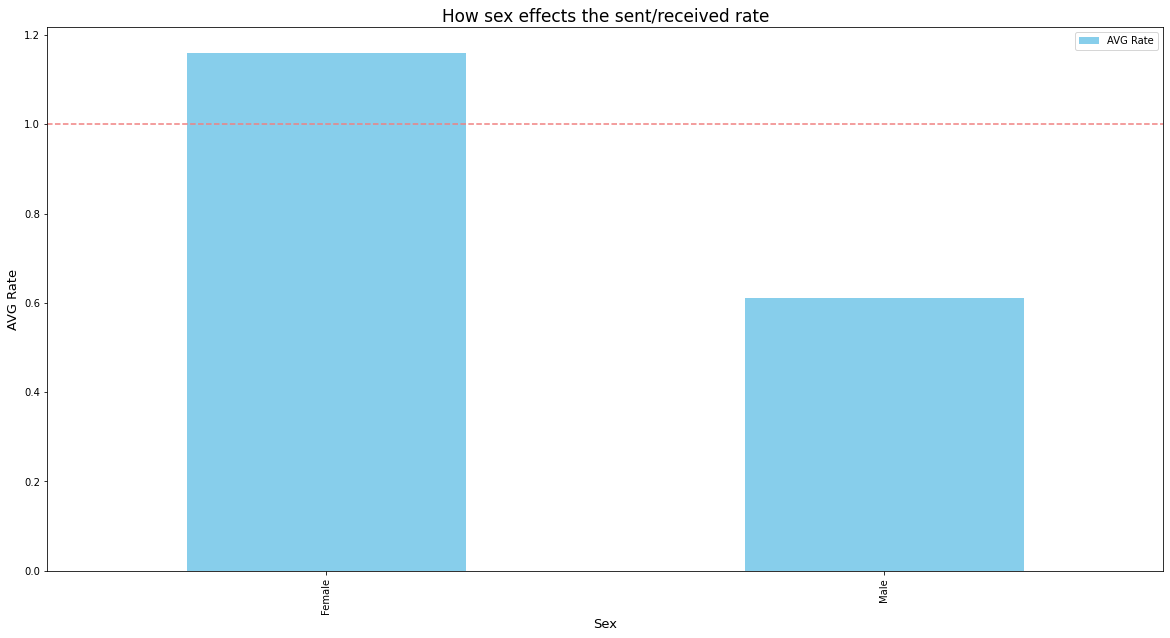

In [890]:
merged2.sort_values(by=['rate'], inplace=True,ascending=False)
merged2['gender'] = ['f','f','f','f','m','m','f','m','m','m']
fem = (merged2.loc[merged2['gender'] == 'f'])["Sent"].sum() / (merged2.loc[merged2['gender'] == 'f'])["Received"].sum()
male = (merged2.loc[merged2['gender'] == 'm'])["Sent"].sum() / (merged2.loc[merged2['gender'] == 'm'])["Received"].sum()

gendDF=pd.DataFrame({'Sex':['Female', 'Male'],
                'AVG Rate':[fem,male]})

ax = gendDF.plot.bar(title="rate of sent/received", figsize=(20,10),x="Sex",color='SkyBlue')
ax.set_xlabel("Sex",fontsize=13)
ax.set_ylabel("AVG Rate",fontsize=13)
ax.set_title("How sex effects the sent/received rate",fontsize=17)
ax.axhline(y=1, color='lightCoral', linestyle='dashed')
gendDF.head(10)

###  ☑️Співвідношення кількості повідомлень, на кількість моїх смішних реакцій

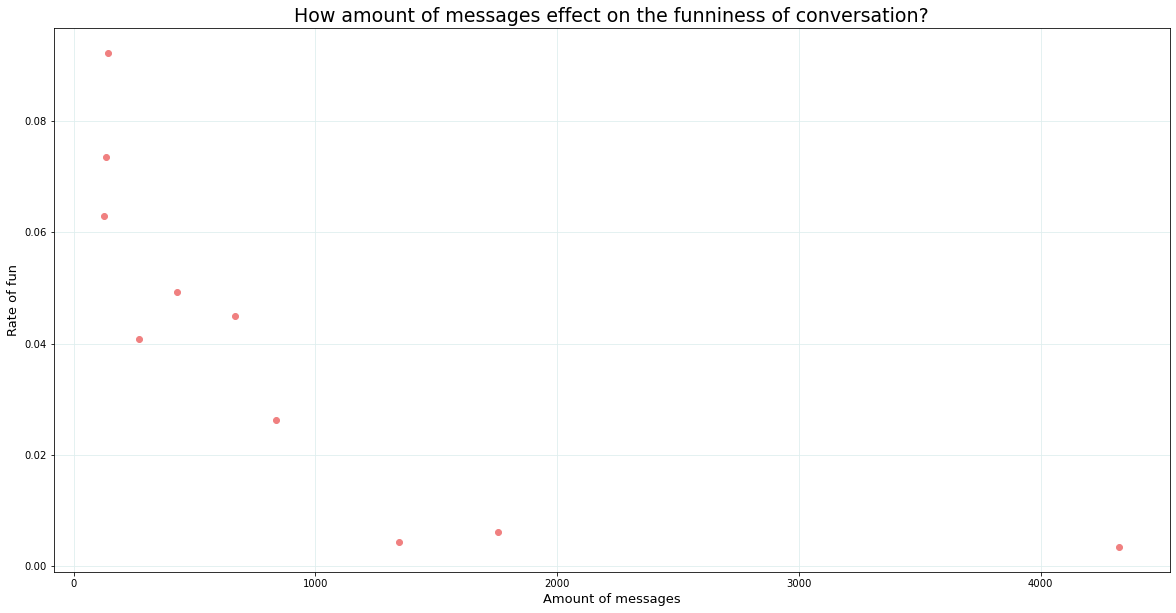

unique_values  funny  not funny      rate
0           Yulia     13        141  0.092199
1      Angelinaaa     10        136  0.073529
2         rocknik      8        127  0.062992
3    Аня Вареник🥟     21        426  0.049296
4          Мarina     30        667  0.044978
5               S     11        269  0.040892
6  Kate Seawalker     22        837  0.026284
7      Kate Korol     11       1756  0.006264
8               🐌      6       1345  0.004461
9          Лиза 🌿     15       4323  0.003470

In [897]:
laugh= ["хаха","пхпх"," лол "]
df_pp = df_meta.loc[df_meta['type'] == 'Private dialog']
merged = df_pp.merge(df, on='dialog_id', how='inner')
df_laugh = merged[(merged['message'].isnull()==0)]
df_laugh = df_laugh[(df_laugh['type_y']=="text")]
df_laugh = df_laugh[df_laugh['from_id'].str.contains(str(my_id),na=False)]


df_laugh['ahah']= '-'


df_laugh["ahah"][df_laugh['message'].str.contains("хаха",case=False)] = "+"
df_laugh["ahah"][df_laugh['message'].str.contains("пхпх",case=False)] = "+"
df_laugh["ahah"][df_laugh['message'].str.contains(" лол ",case=False)] = "+"
df_laugh["ahah"][df_laugh['message'].str.contains("😂",case=False)] = "+"

funny=df_laugh.loc[df_laugh['ahah'] == "+"]
funny = funny["name"].value_counts().rename_axis('unique_values').to_frame('counts')
funny= funny.head(10)
nonFunny=df_laugh.loc[df_laugh['ahah'] == "-"]
nonFunny = nonFunny["name"].value_counts().rename_axis('unique_values').to_frame('counts')

mergedFun = funny.merge(nonFunny, on='unique_values', how='inner')
mergedFun=mergedFun.rename(columns={'counts_x': 'funny', 'counts_y': 'not funny'})

mergedFun["rate"] = mergedFun["funny"]/mergedFun["not funny"]
mergedFun.sort_values(by=['rate'], inplace=True,ascending=False)
mergedFun = mergedFun.rename_axis('unique_values').reset_index()
mergedFun.head(10)
plt.figure(figsize=(20,10))  
plt.scatter(mergedFun["not funny"],mergedFun["rate"],color="LightCoral")
plt.title('How amount of messages effect on the funniness of conversation?',fontsize=19)
plt.ylabel('Rate of fun',fontsize=13)
plt.xlabel('Amount of messages',fontsize=13)
plt.grid(True, color='#DEEEEE')
plt.show()
mergedFun.head(10)


По графіку можемо бачити, що чим довше я спілкуюся з людьми, тим менш весело стає)

# Дослідження моєї активності в тг
### Обчислимо середню тривалість моїх голосових у трьох різних часових проміжках

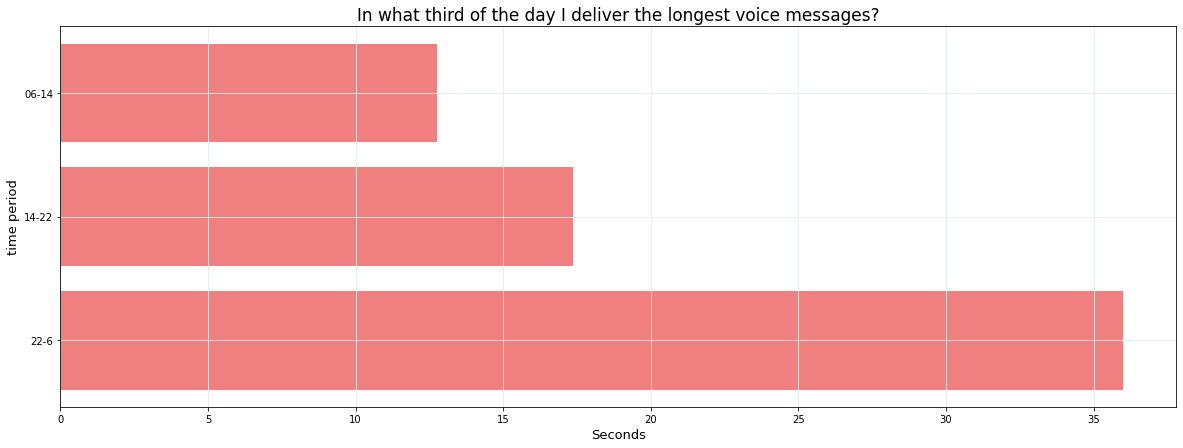

In [602]:
df_voice_stat=df.loc[df['type'] == 'voice']
df_voice_stat=df_voice_stat.loc[df_voice_stat['from_id'] == 'PeerUser(user_id='+my_id+')']
df_voice_stat["date"]=pd.to_datetime(df_voice_stat['date'])
df_voice_stat = df_voice_stat.set_index('date')


# df2 = pd.DataFrame([{'6-14': (df_voice_stat["duration"].between_time('6:00', '14:00')).mean(),
#                      '14-22': (df_voice_stat["duration"].between_time('14:00', '22:00')).mean(),
#                      '22-6':(df_voice_stat["duration"].between_time('22:00', '6:00')).mean()}])

df2=pd.DataFrame({'Period':['22-6', '14-22', '06-14'],
                'AVG':[
                    (df_voice_stat["duration"].between_time('22:00', '6:00')).mean(),   
                    (df_voice_stat["duration"].between_time('14:00', '22:00')).mean(),
                    (df_voice_stat["duration"].between_time('6:00', '14:00')).mean(),]})

plt.figure(figsize=(20,7))  
plt.barh(df2["Period"],df2["AVG"],color = "LightCoral")
plt.title('In what third of the day I deliver the longest voice messages?',fontsize=17)
plt.ylabel('time period',fontsize=13)
plt.xlabel('Seconds',fontsize=13)
plt.grid(True, color='#DEEEEE')
plt.show()
 



На диво, найдовші голосові я записую вночі.

### Яка моя активність в тг протягом тижня?

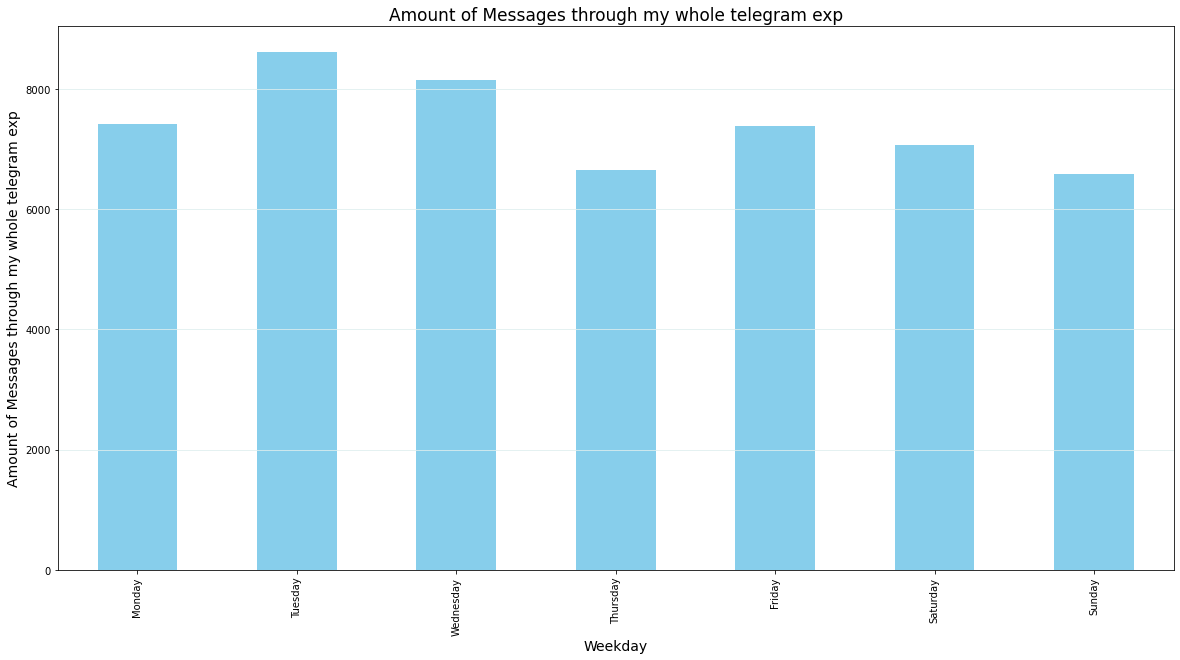

In [875]:
df_weekday = df
df_weekday = df_weekday[df_weekday["from_id"].str.contains(str(my_id),na=False)]
df_weekday["date"]=pd.to_datetime(df_weekday['date']).dt.dayofweek
days = df_weekday["date"].value_counts(sort=False)
days = days.reindex(index={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
days = days.rename(index={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

lines = days.plot.bar(figsize=(20, 10), color = "SkyBlue")
lines.set_xlabel("Weekday",fontsize=14)
lines.set_ylabel("Amount of Messages through my whole telegram exp",fontsize=14)
lines.set_title("Amount of Messages through my whole telegram exp",fontsize=17)
lines.yaxis.grid(True, color='#DEEEEE')


# plt.title('In what third of the day I deliver the longest voice messages?')
# plt.ylabel('time period')
# plt.xlabel('Seconds')
# plt.show()
 


Чомусь в четвер, я проводжу найменше часу в тг)

###  ☑️В які години я найбільш активний?

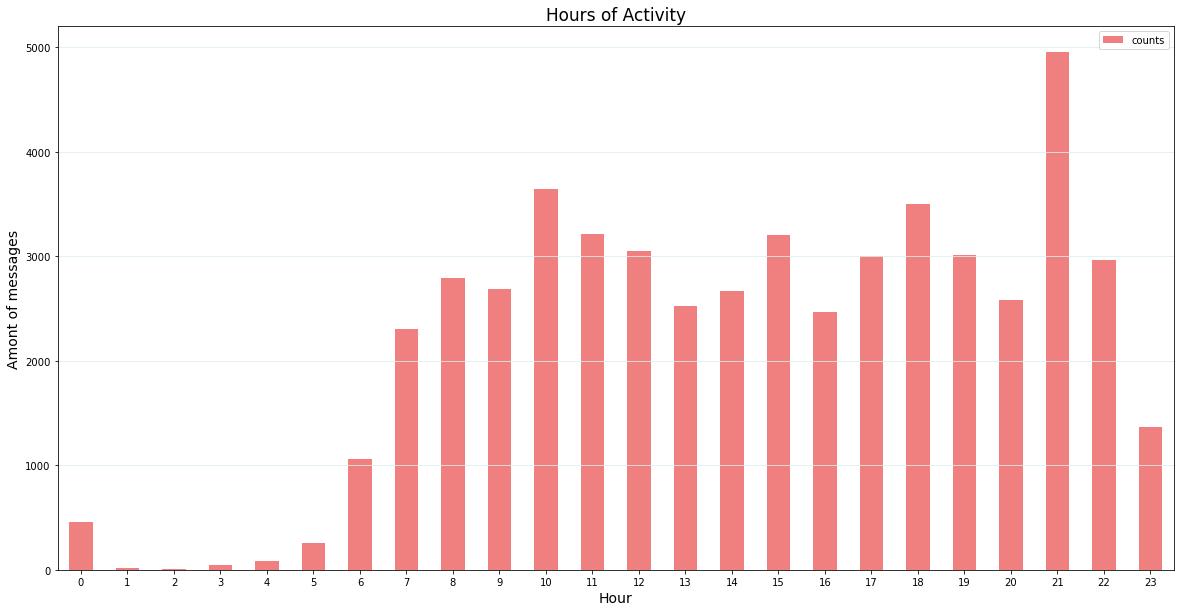

In [877]:
df_hour = df
df_hour["date"]=pd.to_datetime(df_hour['date']).dt.hour
df_hour = df_hour[df_hour["from_id"].str.contains(str(my_id),na=False)]
df_hour = df_hour["date"].value_counts(sort=False).rename_axis('messages').to_frame('counts')
df_hour.sort_values(by=['messages'], inplace=True,ascending=True)

ax = df_hour.plot.bar(color="lightCoral", rot=0, figsize=(20,10))
ax.set_xlabel("Hour",fontsize=14)
ax.set_ylabel("Amont of messages",fontsize=14)
ax.set_title("Hours of Activity",fontsize=17)

ax.yaxis.grid(True, color='#DEEEEE')


plt.show()



### Яке співвідношення довжини моїх повідомлень?

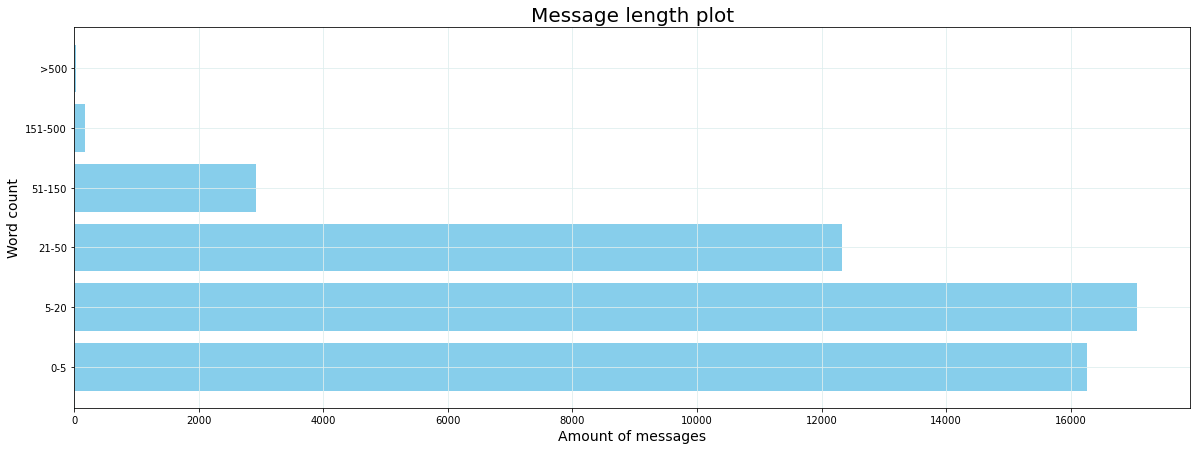

In [879]:
df_length=df.loc[df['type'] == 'text']
df_length = df_length[df_length["from_id"].str.contains(str(my_id),na=False)]
df_length = df_length.loc[(df_length['message'].isnull()==0)]
df_length["len"]=(df_length["message"]).str.len()
df_length.head(10)

df2=df_length['len'].between(0, 6, inclusive=False).sum()

df2=pd.DataFrame({'Amount':['0-5', '5-20', '21-50','51-150',"151-500",">500"],
                'AVG':[
                     (df_length['len'].between(0, 6, inclusive=False).sum()),
                     (df_length['len'].between(5, 21, inclusive=False).sum()),
                     (df_length['len'].between(20, 51, inclusive=False).sum()),
                     (df_length['len'].between(50, 151, inclusive=False).sum()),
                     (df_length['len'].between(150, 501, inclusive=False).sum()),
                     (df_length["len"] > 500 ).sum(),]})
plt.figure(figsize=(20,7))  
plt.barh(df2["Amount"],df2["AVG"],color="SkyBlue")
plt.title('Message length plot',fontsize=20)
plt.ylabel('Word count',fontsize=14)
plt.xlabel('Amount of messages',fontsize=14)
plt.grid(True, color='#DEEEEE')
plt.show()
 


### З ким у мене найбільше спільних груп?

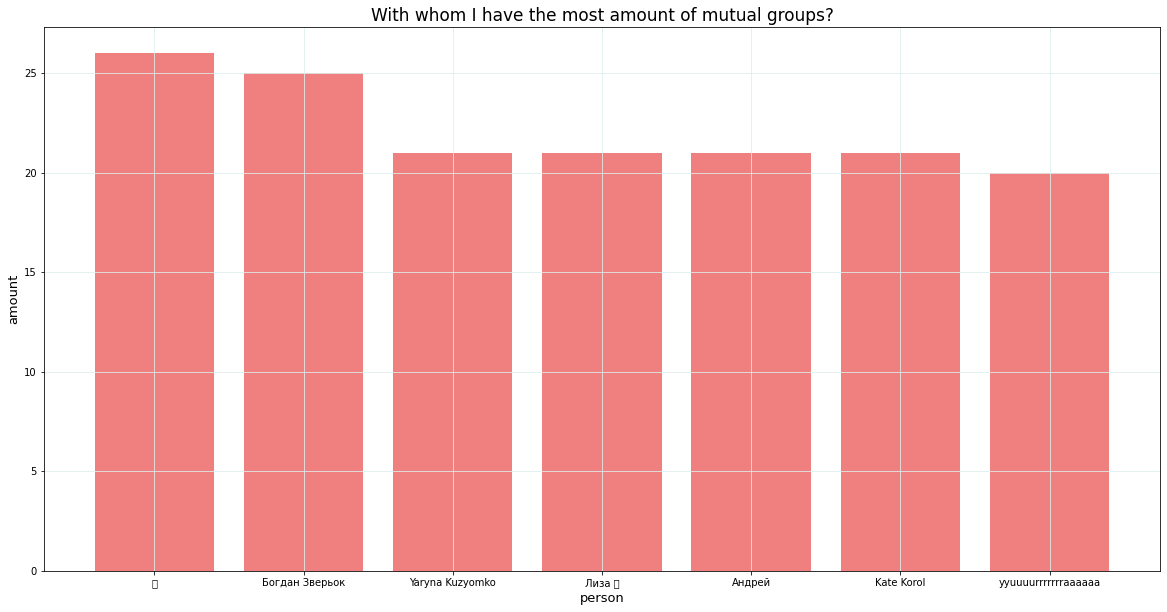

In [599]:
df_meta_group = df_meta.loc[(df_meta['type'] == "Group")]
df_meta_private = df_meta.loc[(df_meta['type'] == "Private dialog")]
df_meta_group=df_meta_group.loc[df_meta_group['users'].str.contains("Bhurskyy")==0]
df_meta_private['counts'] = df_meta_private['users'].map(df_meta_group['users'].value_counts())
df_meta_private=df_meta_private.sort_values('counts', ascending = False)
df_meta_private=df_meta_private.head(7)
plt.figure(figsize=(20,10))  
plt.grid(True, color='#DEEEEE')

plt.bar(df_meta_private["name"],df_meta_private["counts"], color="LightCoral")
plt.title('With whom I have the most amount of mutual groups?',fontsize=17)
plt.ylabel('amount',fontsize=13)
plt.xlabel('person',fontsize=13)

plt.show()  #цей квадратик це емодзі, це справжня людина насправді

Цей квадратик це емодзі равлика)

###  ☑️Які данні я зберігаю?

Text(0, 0.5, '')

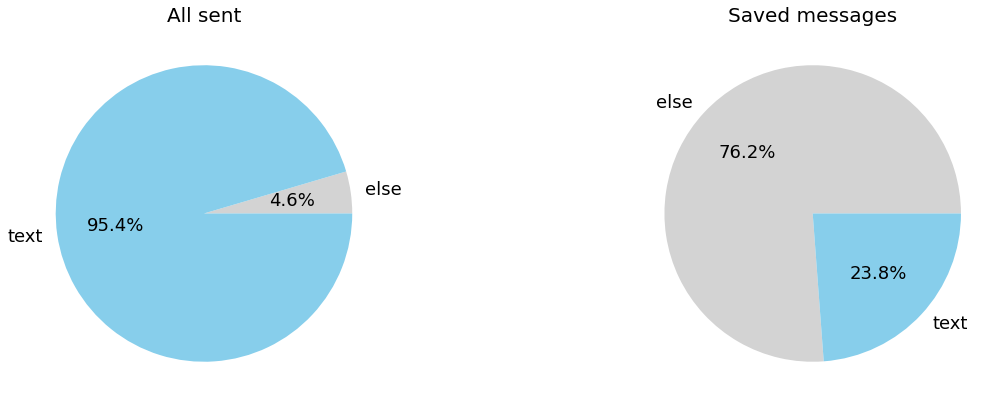

In [468]:
dfOnlyText=df.copy()
dfOnlyText["type"][dfOnlyText["type"]!="text"]="else"
dfOnlyText.head()

df_stats=dfOnlyText[dfOnlyText['from_id'].str.contains(str(my_id),na=False)]
df_saved = dfOnlyText[dfOnlyText['dialog_id']==497713871]

df_stats=df_stats.groupby(["type"])["type"].count()
df_saved=df_saved.groupby(["type"])["type"].count()

fig = plt.figure(figsize=(20,15))
#2 rows 2 columns

#first row, first column
ax1 = plt.subplot2grid((2,2),(0,0))
pie = df_stats.plot.pie(colors = ['LightGrey', 'SkyBlue'],autopct='%1.1f%%',fontsize=18)
plt.title('All sent',  fontsize=20)
#plt.legend(df_stats["unique_values"], loc="best")
plt.ylabel('')


#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
pie = df_saved.plot.pie(colors = ['LightGrey', 'SkyBlue'],autopct='%1.1f%%',fontsize=18)
plt.title('Saved messages', fontsize=20)
plt.ylabel('')



У Saved messages зачасту іде більше мультимедіа контенту, ніж сирого тексту

Text(0, 0.5, '')

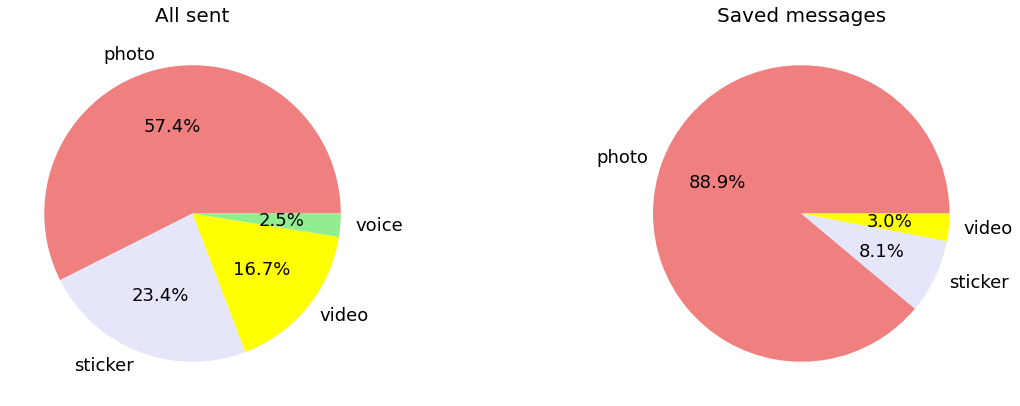

In [880]:
dfNotext=df[df['type']!="text"]

df_stats=dfNotext[dfNotext['from_id'].str.contains(str(my_id),na=False)]
df_saved = dfNotext[dfNotext['dialog_id']==497713871]


df_stats=df_stats.groupby(["type"])["type"].count()
df_saved=df_saved.groupby(["type"])["type"].count()


fig = plt.figure(figsize=(20,15))
#2 rows 2 columns

#first row, first column
ax1 = plt.subplot2grid((2,2),(0,0))
pie = df_stats.plot.pie(colors = ['lightCoral', 'lavender',"yellow","LightGreen"],autopct='%1.1f%%',fontsize=18)
plt.title('All sent',  fontsize=20)
#plt.legend(df_stats["unique_values"], loc="best")
plt.ylabel('')


#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
pie = df_saved.plot.pie(colors = ['lightCoral', 'lavender',"yellow","LightGreen"],autopct='%1.1f%%',fontsize=18)
plt.title('Saved messages', fontsize=20)
plt.ylabel('')


А ось розбіжність серез мультимедіа коненту

### Cередня довжина голосових повідомлень співрозмовників

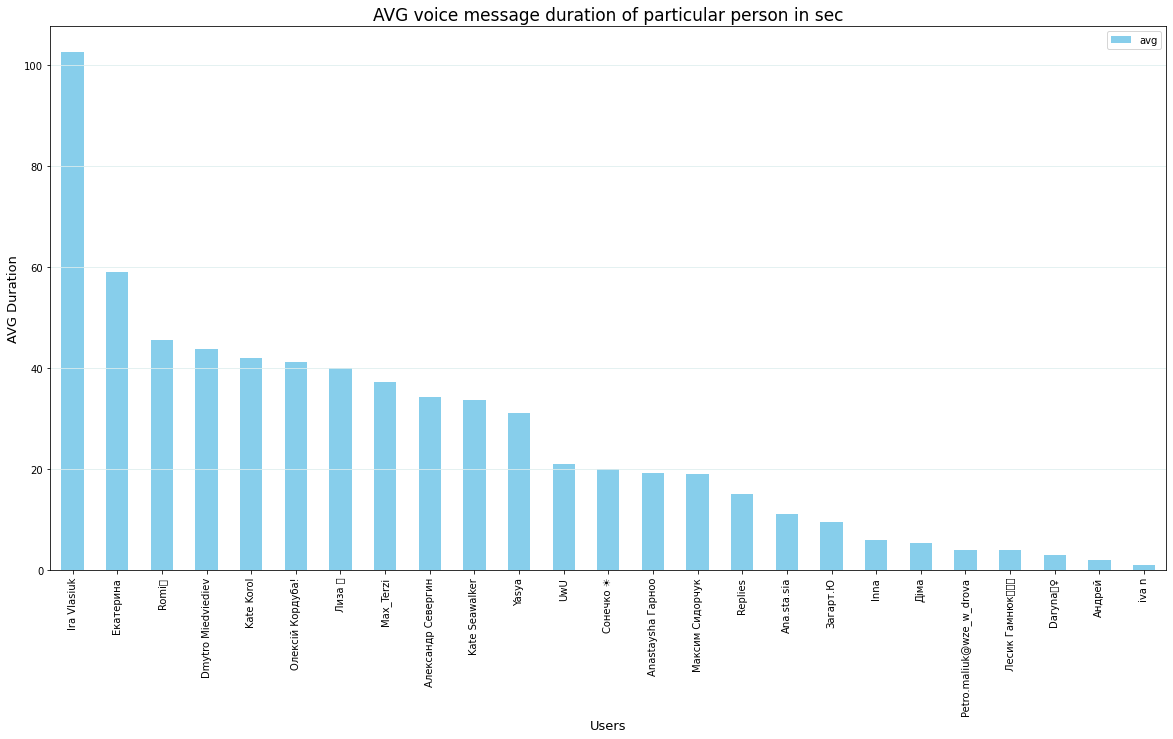

In [893]:
df_pp2 = df_meta.loc[df_meta['type'] == 'Private dialog']
df_pp2 = df_pp2.merge(df, on='dialog_id', how='inner')
df_pp2=df_pp2.loc[df_pp2['to_id'] == my_id]
df_pp2=df_pp2.loc[df_pp2['type_y'] == "voice"]


avgVoice = df_pp2.groupby("name")["duration"].mean().rename_axis('unique_values').to_frame('avg')
avgVoice.sort_values(by=['avg'], inplace=True,ascending=False)


ax = avgVoice.plot.bar(color="SkyBlue", figsize=(20,10))
ax.set_xlabel("Users",fontsize=13)
ax.set_ylabel("AVG Duration",fontsize=13)
ax.set_title("AVG voice message duration of particular person in sec",fontsize=17)
ax.yaxis.grid(True, color='#DEEEEE')

#ax.axhline(y=1, color='lightCoral', linestyle='dashed')


# Дослідження Груп/Каналів


###  Статистика вживання матів у чаті нашої спеціальності окремими людьми.

Створюємно список матів

In [12]:
my_file2 = open(cuss, encoding = 'utf-8', mode = 'r')
data = my_file2.read()
  
# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
data_into_list = data.split()

print(data_into_list)
my_file2.close()

['архипиздрит', 'басран', 'бздение', 'бздеть', 'бздех', 'бзднуть', 'бздун', 'бздунья', 'бздюха', 'бикса', 'cук', 'блежник', 'гандон', 'блудилище', 'курва', 'бляд', 'йобана', 'блябу', 'хуйня', 'блябуду', 'хуйні', 'блядун', 'хуєта', 'блядунья', 'єбав', 'блядь', 'їбав', 'бля', 'курву', 'блять', 'курві', 'сука', 'Бздун', 'бздюха', 'Бевзь', 'бевзень', 'Бешкетник', 'Біс', 'Блазень', 'Бовдур', 'Бусурман', 'хуйло', 'хуй', 'пизда', 'пізда', 'піхва', 'їбать', 'їбати', 'Вайло', 'Вилупок', 'Залупок', 'гімно', 'гівняний', 'Виродок', 'Вишкребок', 'Віддухопелити', 'відлупцювати', 'Волоцюга', 'Ґамселити', 'Гаспид', 'Гидота', 'Гнида', 'Лайно', 'Дідько', 'Дрочило', 'Дурбелик', 'Дурбелик', 'срака', 'гепа', 'Гузно', 'Йолоп', 'курва', 'лярва', 'наволоч', 'Покидьок', 'Стерво', 'падлюка', 'падаль', 'шмара', 'шмата', 'Шльондра', 'Хльорка', 'бляяя', 'блядюга', 'взьебка', 'волосянка', 'взьебывать', "вз'ебывать", 'выблядок', 'выблядыш', 'выебать', 'выеть', 'выпердеть', 'хуйні', 'высраться', 'выссаться', 'говенка

Обчислюємо співвідношення усіх повідомлень, до повідомлень, що містять мати

In [18]:
merged = df_meta.loc[df_meta['name'] == 'Примати20х2']
merged = merged.merge(df, on='dialog_id', how='inner')
merged=merged.loc[merged['type_y'] == 'text']
merged = merged.loc[(merged['message'].isnull()==0)]
merged = merged.drop_duplicates(subset = ["date","message","from_id"])
merged = merged[merged["from_id"].str.contains("channel_id")==0]

merged["cuss"]=(merged['message'].apply(lambda x: any([i in str(x) for i in data_into_list])))
merged_cuss=merged[merged["cuss"]==True]
merged_cuss=merged_cuss["from_id"].value_counts().rename_axis('unique_values').to_frame('counts')
merged=merged["from_id"].value_counts().rename_axis('unique_values').to_frame('counts')

merged_cuss2 = merged.merge(merged_cuss, on='unique_values', how='inner')

merged_cuss2=merged_cuss2.rename(columns={'counts_x': 'all', 'counts_y': 'cuss'})
merged_cuss2["rate"]=merged_cuss2["cuss"]/merged_cuss2["all"]
merged_cuss2=merged_cuss2.sort_values('rate', ascending = False)

merged_cuss2.head(5)

all  cuss      rate
unique_values                                     
PeerUser(user_id=470773767)   2892   274  0.094744
PeerUser(user_id=269149148)   4974   312  0.062726
PeerUser(user_id=1419351245)  2093   120  0.057334
PeerUser(user_id=353330283)    526    29  0.055133
PeerUser(user_id=716096216)   4843   253  0.052240

Будуємо Scatter, беремо 5 значеннь з найвищим рейтом і 5 з найменшим, для наглядності аналізу

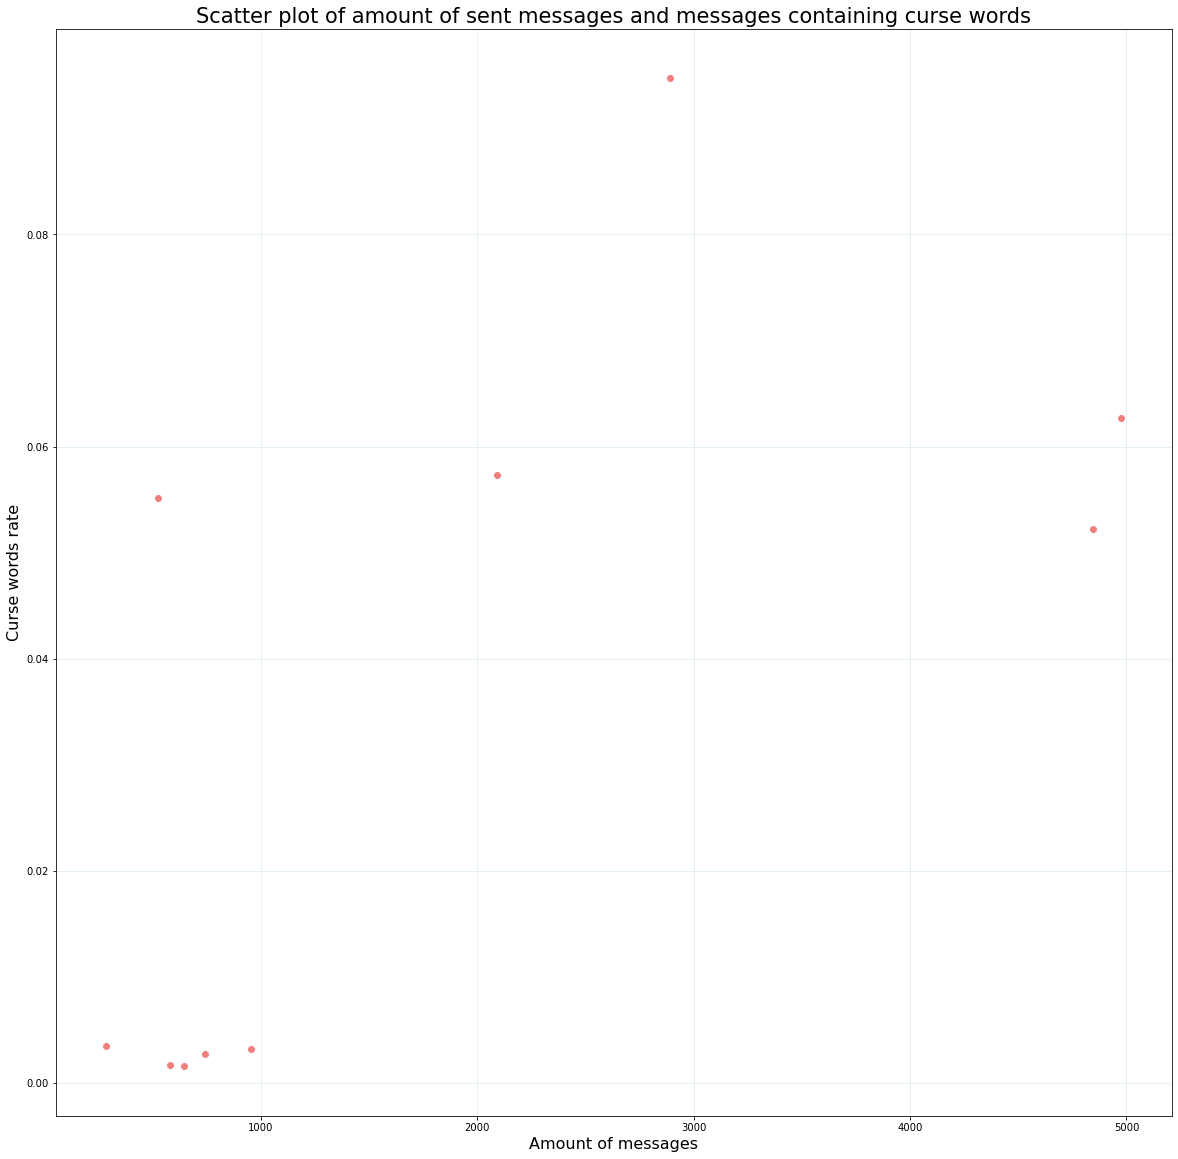

In [19]:
merged_cuss2 = merged_cuss2.iloc[np.r_[0:5, -5:0]]
merged_cuss2 = merged_cuss2.rename_axis('unique_values').reset_index()
plt.figure(figsize=(20,20))  
plt.scatter(merged_cuss2["all"],merged_cuss2["rate"],color="LightCoral")
plt.title('Scatter plot of amount of sent messages and messages containing curse words',fontsize=21)
plt.ylabel('Curse words rate',fontsize=16)
plt.xlabel('Amount of messages',fontsize=16)
plt.grid(True, color='#DEEEEE')
plt.show()

У лівому нижньому кутку спостерігаємо скупчення користувачів: це "скромні", вони пишуть в чат рідко, мат вживають дуже рідко, тому у них і низький рейт і мало повідомлень. Решта користувачів розміщенні відповідно до своїх звичок у спілкуванні.

### Порівняємо кількість посилань в каналах (зачасту реклама) і кількість посилань у ПП

2021-03-11    114
2021-09-28    113
2021-11-04    111
2021-09-30    107
2021-11-02    107
Name: date, dtype: int64

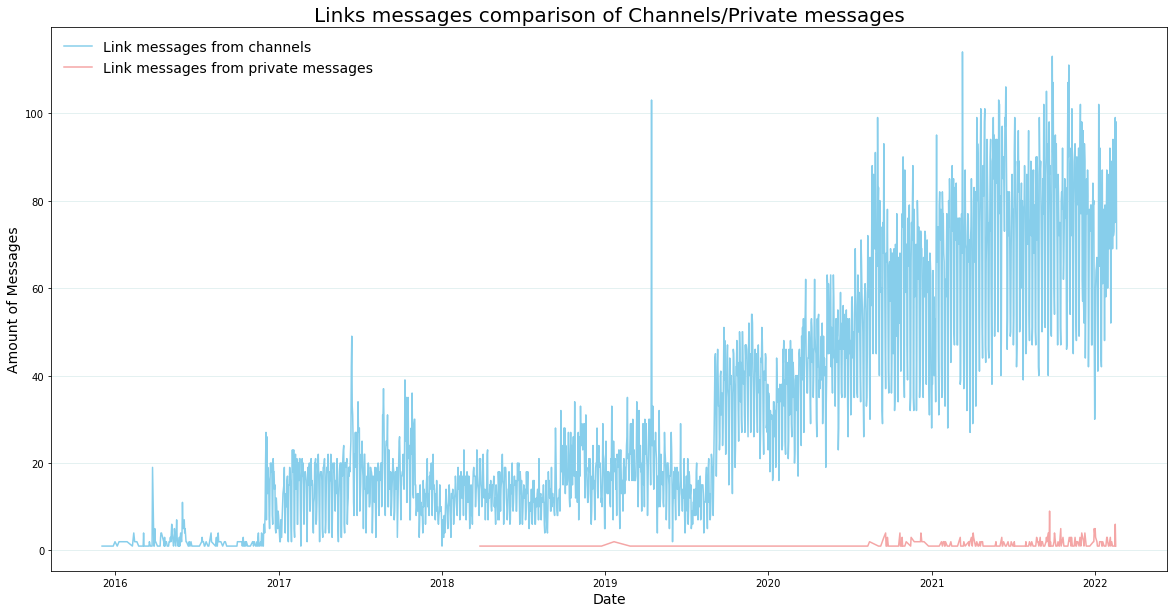

In [903]:
df_pp = df_meta.loc[df_meta['type'] == 'Private dialog']
merged = df_pp.merge(df, on='dialog_id', how='inner')
df_link_pp=merged[merged['message'].isna()==0]

df_link_pp=df_link_pp[df_link_pp['message'].str.contains("https",na=False)]
df_link_pp["date"]=pd.to_datetime(df_link_pp['date']).dt.date
df_link_pp=df_link_pp["date"].value_counts()

lines = df_link.plot.line(figsize=(20, 10), label = "Link messages from channels", color = "SkyBlue")
df_link_pp.plot.line(color="LightCoral", label = "Link messages from private messages",alpha=0.7)
lines.legend(loc='upper left', frameon=False,fontsize=14)
lines.set_xlabel("Date",fontsize=14)
lines.set_ylabel("Amount of Messages",fontsize=14)
lines.set_title("Links messages comparison of Channels/Private messages",fontsize=20)
lines.yaxis.grid(True, color='#DEEEEE')


df_link.head()




### Активність у нашому css чаті

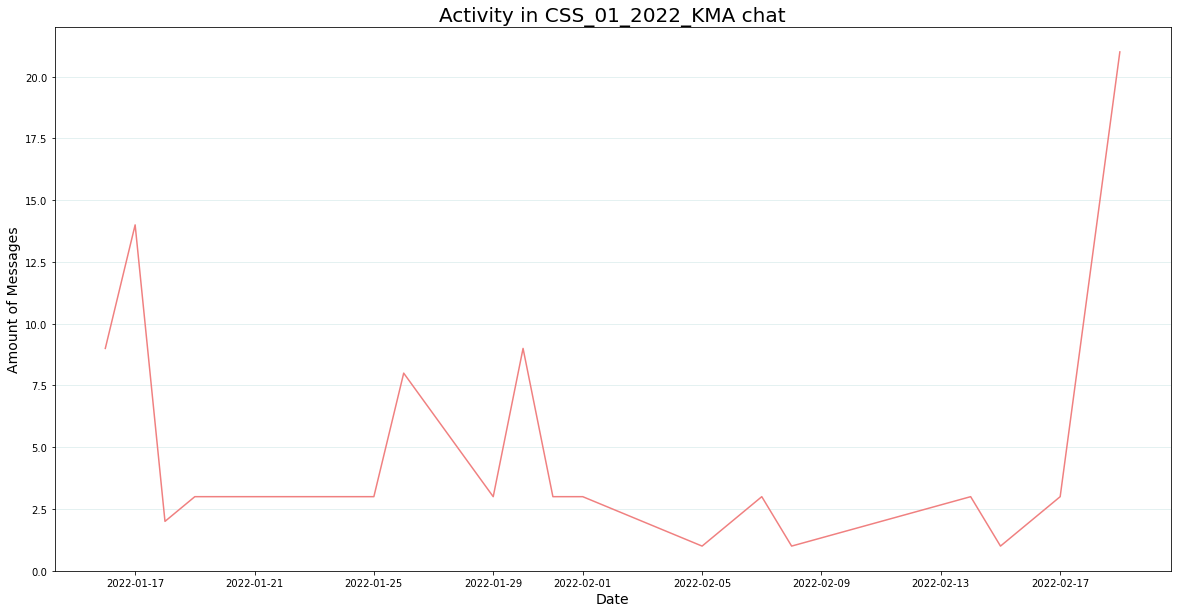

In [15]:
df_meta_css = df_meta.loc[df_meta['name'] == 'CSS_01_2022_KMA']
merged = df_meta_css.merge(df, on='dialog_id', how='inner')
merged = merged.loc[(merged['message'].isnull()==0)]
merged = merged.drop_duplicates(subset = ["date","message"])
merged["date"]=pd.to_datetime(merged['date']).dt.date
merged=merged["date"].value_counts()
merged.head(100)

lines = merged.plot.line(figsize=(20, 10), label = "Sent messages", color = "LightCoral")
lines.set_xlabel("Date",fontsize=14)
lines.set_ylabel("Amount of Messages",fontsize=14)
lines.set_title("Activity in CSS_01_2022_KMA chat",fontsize=20)
lines.yaxis.grid(True, color='#DEEEEE')



###  ☑️Дослідження вживання слів у чаті нашої спеціальності

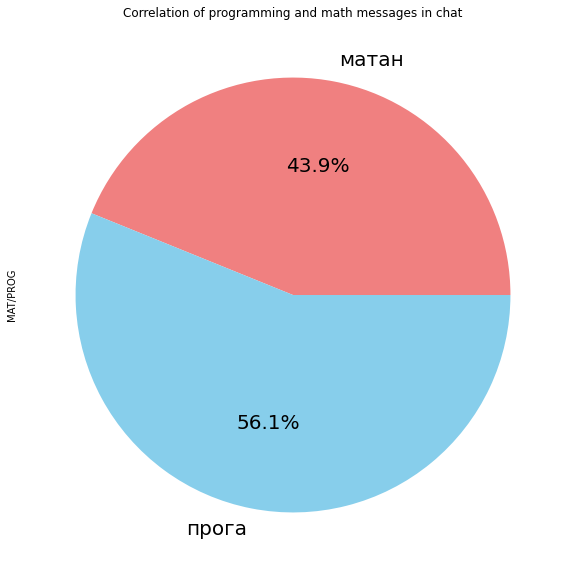

In [17]:
merged = df_meta.loc[df_meta['name'] == 'Примати20х2']
merged = merged.merge(df, on='dialog_id', how='inner')
merged = merged.drop_duplicates(subset = ["date","message","from_id"])
merged=merged.loc[merged['type_y'] == 'text']
merged = merged.loc[(merged['message'].isnull()==0)]

merged['MAT/PROG'] = 'no'
merged= merged.loc[((merged['message'].str.contains("матан")) & (merged['message'].str.contains("прог"))) == 0]
merged["MAT/PROG"][merged['message'].str.contains("матан")] = "матан"
merged["MAT/PROG"][merged['message'].str.contains("прог")] = "прога"
merged= merged.loc[merged['MAT/PROG'] != "no"]

dfPie=merged.groupby(["MAT/PROG"])["MAT/PROG"].count()
pie = dfPie.plot.pie(figsize=(10, 10),colors = ['lightCoral', 'SkyBlue'],title="Correlation of programming and math messages in chat",autopct='%1.1f%%',fontsize=20)


Глянемо на динаміку вживання

Text(0.5, 1.0, 'Dynamic of two word roots usage')

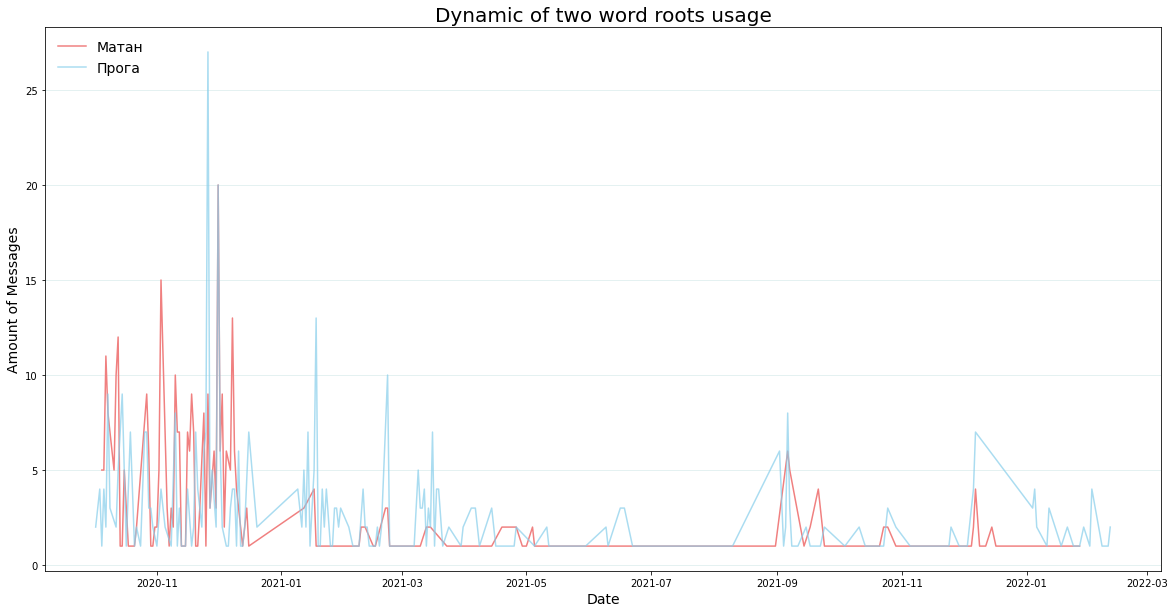

In [932]:
merged["date"]=pd.to_datetime(merged['date']).dt.date

dfMatan = (merged.loc[(merged['MAT/PROG']=="матан")])
dfProga = (merged.loc[(merged['MAT/PROG']=="прога")])

dfMatan=dfMatan["date"].value_counts()
dfProga=dfProga["date"].value_counts()

lines = dfMatan.plot.line(figsize=(20, 10), label = "Матан",color ="lightCoral")
dfProga.plot.line(color="SkyBlue", label = "Прога",alpha=0.7)
lines.legend(loc='upper left', frameon=False,fontsize=14)
lines.set_xlabel("Date",fontsize=14)
lines.yaxis.grid(True, color='#DEEEEE')
lines.set_ylabel("Amount of Messages",fontsize=14)
lines.set_title("Dynamic of two word roots usage",fontsize=20)

Можемо спостерігати, як падає зацікавленність у навчанні, дуже помітна різниця на прикладі початків 1го і 2го року навчання.